In [1]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from metrics import top_3_acc
from os import listdir
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
%matplotlib inline

/Users/filipgulan/.virtualenvs/deep-learning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/filipgulan/.virtualenvs/deep-learning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
DATASET_PATH = "/Users/filipgulan/Downloads/test"
OUTPUT_PATH = "/Users/filipgulan/test_class"

In [3]:
model = load_model('../models/weights_ep_04-vloss_0.0002.hdf5',custom_objects={'top_3_acc': top_3_acc})

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', top_3_acc])

In [4]:
## Ovo treba povuci kod treniranja => train_generator.class_indices
## i spremiti u model da ja mogu povuci kao custom varijablu iz modela

labels = {'HyVee': 8, 'Target': 19, 'CVSPharmacy': 2, 
          'Wegmans': 22, 'HEB': 6, 'StopShop': 18, 'BJs': 1, 
          'Albertsons': 0, 'FredMeyer': 4, 'Walgreens': 20, 
          'KingSoopers': 10, 'Walmart': 21, 'Safeway': 14, 
          'ShopRite': 16, 'Costco': 3, 'SamsClub': 15, 
          'WinCoFoods': 24, 'HarrisTeeter': 7, 'WholeFoodsMarket': 23,
          'Kroger': 11, 'Smiths': 17, 'Meijer': 12, 
          'Publix': 13, 'Frys': 5, 'JewelOsco': 9}

class_labels = {v: k for k, v in labels.items()}

In [8]:
input_size = (331, 182)
batch_size = 50

def preprocess_image(img):
    return img
    #img_array = img_to_array(img)
    # TODO: Preprocessing
    #return array_to_img(img_array)
    
datagen = ImageDataGenerator(preprocessing_function=preprocess_image,
                             samplewise_center=True,
                             samplewise_std_normalization=True)

gen_flow = datagen.flow_from_directory(
        DATASET_PATH, 
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

predict = model.predict_generator(gen_flow, steps=200)
predicted_classes = np.argmax(predict, axis=1)

Found 10000 images belonging to 1 classes.


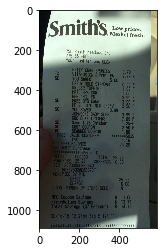

Filename: Dataset/0.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Safeway conf: 2.9494196e-10
Top 3 class: Frys conf: 4.727932e-11


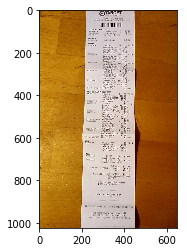

Filename: Dataset/1.jpg
Top 1 class: Target conf: 0.5699312
Top 2 class: StopShop conf: 0.41720805
Top 3 class: Safeway conf: 0.0064907493


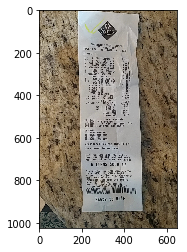

Filename: Dataset/10.jpg
Top 1 class: SamsClub conf: 0.9999988
Top 2 class: Walmart conf: 8.1359576e-07
Top 3 class: BJs conf: 1.9237913e-07


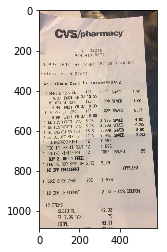

Filename: Dataset/100.jpg
Top 1 class: CVSPharmacy conf: 1.0
Top 2 class: Wegmans conf: 5.8640634e-11
Top 3 class: ShopRite conf: 9.554817e-12


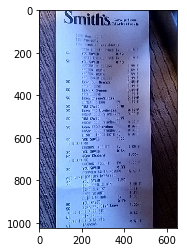

Filename: Dataset/1000.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Frys conf: 6.448237e-13
Top 3 class: Safeway conf: 1.9523059e-13


In [12]:
plt.figure()
for i in range(5):
    img = Image.open(os.path.join(DATASET_PATH, gen_flow.filenames[i]))
    plt.imshow(img)
    plt.show()
    top3 = list(reversed(sorted(predict[i])[-3:]))
    top3_arg = np.argsort(predict[i])[-3:]
    print("Filename:", gen_flow.filenames[i])
    for j, class_indice in enumerate(reversed(top3_arg)):
        print("Top", (j+1), "class:", class_labels[class_indice], "conf:", top3[j])

In [20]:
def get_class(index):
    top3 = list(reversed(sorted(predict[i])[-3:]))
    top3_arg = np.argsort(predict[i])[-3:]
    out = None
    if top3[0] - top3[1] < 0.5:
        out = "Other"
    else:
        out = class_labels[top3_arg[2]]
    print(out)
    return out
        
for i, predicted in enumerate(range(1000)):
    img = Image.open(os.path.join(DATASET_PATH, gen_flow.filenames[i]))
    filename = gen_flow.filenames[i].split("/")[1]
    img_class = get_class(i)
    path = os.path.join(OUTPUT_PATH, img_class)
    path = os.path.join(path, filename)
    img.save(path)

Smiths
Target
SamsClub
CVSPharmacy
Smiths
Walgreens
Frys
Frys
WholeFoodsMarket
Wegmans
Smiths
Smiths
Target
JewelOsco
Frys
Meijer
Smiths
Safeway
FredMeyer
Smiths
JewelOsco
FredMeyer
Walgreens
Other
JewelOsco
Meijer
Walgreens
Albertsons
Safeway
Smiths
Costco
StopShop
FredMeyer
JewelOsco
Kroger
WinCoFoods
Other
Wegmans
WholeFoodsMarket
SamsClub
WholeFoodsMarket
JewelOsco
Publix
Walgreens
WinCoFoods
WinCoFoods
FredMeyer
WinCoFoods
Meijer
Smiths
WinCoFoods
HarrisTeeter
Safeway
HEB
JewelOsco
SamsClub
KingSoopers
Frys
HyVee
Publix
Target
Frys
HarrisTeeter
Frys
FredMeyer
HarrisTeeter
Costco
Kroger
Costco
Costco
Publix
FredMeyer
Other
SamsClub
SamsClub
Smiths
FredMeyer
Kroger
HyVee
WholeFoodsMarket
Albertsons
Safeway
Publix
WinCoFoods
Wegmans
Target
StopShop
JewelOsco
WholeFoodsMarket
HEB
Publix
Frys
JewelOsco
Kroger
Wegmans
Other
Albertsons
WinCoFoods
Safeway
Costco
Smiths
HyVee
Target
FredMeyer
SamsClub
Other
Publix
KingSoopers
Smiths
Other
Safeway
WinCoFoods
HEB
Other
WholeFoodsMarket
Kroge

HarrisTeeter
KingSoopers
ShopRite
Wegmans
JewelOsco
HEB
Smiths
Albertsons
Smiths
HyVee
JewelOsco
WinCoFoods
Wegmans
JewelOsco
JewelOsco
Walmart
Smiths
Walgreens
HEB
Kroger
Albertsons
Publix
FredMeyer
Frys
HyVee
Costco
WholeFoodsMarket
Frys
Target
WinCoFoods
Frys


In [41]:
def get_class(index):
    top3 = list(reversed(sorted(predict[i])[-3:]))
    top3_arg = np.argsort(predict[i])[-3:]
    out = None
    if top3[0] - top3[1] < 0.98:
        out = "Other"
    else:
        out = class_labels[top3_arg[2]]
    print(out)
    return out

data = {}
for i, predicted in enumerate(predicted_classes):
    img_class = get_class(i)
    filename = int(gen_flow.filenames[i].split("/")[1].split(".")[0])
    data[filename] = img_class

lines = []
for i in range(10000):
    lines.append(data[i])
print(lines)

Smiths
Other
SamsClub
CVSPharmacy
Smiths
Walgreens
Frys
Frys
Other
Wegmans
Other
Other
Other
Other
Other
Meijer
Smiths
Safeway
FredMeyer
Smiths
JewelOsco
Other
Walgreens
Other
JewelOsco
Other
Walgreens
Other
Safeway
Other
Other
StopShop
Other
Other
Kroger
WinCoFoods
Other
Wegmans
Other
SamsClub
WholeFoodsMarket
JewelOsco
Publix
Walgreens
Other
WinCoFoods
Other
WinCoFoods
Meijer
Other
WinCoFoods
Other
Safeway
Other
JewelOsco
SamsClub
Other
Other
HyVee
Publix
Target
Frys
Other
Other
Other
HarrisTeeter
Other
Kroger
Other
Other
Other
Other
Other
SamsClub
SamsClub
Smiths
Other
Other
HyVee
WholeFoodsMarket
Albertsons
Other
Publix
WinCoFoods
Other
Other
StopShop
JewelOsco
WholeFoodsMarket
HEB
Other
Other
JewelOsco
Kroger
Wegmans
Other
Other
WinCoFoods
Safeway
Other
Smiths
HyVee
Target
Other
SamsClub
Other
Publix
Other
Other
Other
Safeway
WinCoFoods
Other
Other
Other
Kroger
Other
Other
Other
ShopRite
Other
Other
Albertsons
Other
Kroger
Other
Other
Kroger
Other
Other
Publix
JewelOsco
SamsClub
J

Other
Other
Kroger
Other
Costco
JewelOsco
Other
Meijer
Other
ShopRite
Albertsons
Smiths
HyVee
JewelOsco
Other
JewelOsco
StopShop
Frys
Frys
Other
Costco
Other
Meijer
Costco
Other
Kroger
JewelOsco
Other
Other
FredMeyer
Other
HyVee
JewelOsco
Other
Publix
StopShop
ShopRite
Other
JewelOsco
Other
StopShop
ShopRite
Other
Kroger
JewelOsco
Publix
JewelOsco
FredMeyer
WinCoFoods
Target
SamsClub
Safeway
Other
Other
Other
Walmart
Frys
Other
WinCoFoods
Kroger
Other
Other
CVSPharmacy
ShopRite
HEB
Other
Other
Safeway
JewelOsco
FredMeyer
SamsClub
Other
Frys
Frys
StopShop
Other
Safeway
Other
Other
Costco
Other
HarrisTeeter
JewelOsco
Walgreens
Other
Other
HyVee
HEB
Walmart
Walmart
Walgreens
Other
FredMeyer
BJs
WholeFoodsMarket
Albertsons
SamsClub
JewelOsco
JewelOsco
Other
Target
Walgreens
Other
Smiths
Other
Other
WinCoFoods
Costco
Other
Publix
Other
JewelOsco
WholeFoodsMarket
Kroger
Wegmans
FredMeyer
StopShop
KingSoopers
Kroger
BJs
Other
Other
FredMeyer
Smiths
Other
Frys
Other
Other
HarrisTeeter
JewelOsc

Wegmans
WholeFoodsMarket
Other
Smiths
HyVee
FredMeyer
Safeway
Other
Smiths
StopShop
StopShop
JewelOsco
StopShop
Walgreens
Walgreens
ShopRite
Other
HyVee
Wegmans
Other
Other
StopShop
HEB
Smiths
Other
WholeFoodsMarket
Other
Other
Meijer
Other
CVSPharmacy
Smiths
Frys
Other
Safeway
ShopRite
Walmart
Other
Costco
Other
Other
Frys
WinCoFoods
StopShop
Kroger
Other
SamsClub
Other
ShopRite
JewelOsco
Wegmans
Walmart
Other
Other
Frys
HyVee
Other
Other
FredMeyer
Other
Walmart
Costco
WinCoFoods
Other
Costco
Other
WholeFoodsMarket
Other
Other
FredMeyer
Smiths
Costco
Other
Target
Meijer
Other
Kroger
Publix
Other
ShopRite
HarrisTeeter
Other
JewelOsco
HyVee
Meijer
JewelOsco
HyVee
Other
CVSPharmacy
Publix
Other
Wegmans
Other
Other
Other
JewelOsco
WholeFoodsMarket
JewelOsco
Kroger
Other
Other
Other
ShopRite
BJs
Other
BJs
Smiths
CVSPharmacy
Other
Frys
Other
Other
Other
Kroger
SamsClub
HyVee
Other
WholeFoodsMarket
FredMeyer
FredMeyer
Kroger
Frys
Costco
HyVee
SamsClub
FredMeyer
Other
Kroger
Other
Other
Publi

JewelOsco
StopShop
WinCoFoods
CVSPharmacy
JewelOsco
Albertsons
Other
Other
Other
Frys
Other
Other
Other
StopShop
Frys
Walmart
Smiths
Publix
StopShop
Other
FredMeyer
ShopRite
JewelOsco
HarrisTeeter
KingSoopers
Other
WinCoFoods
Frys
ShopRite
Publix
Other
Kroger
Other
CVSPharmacy
Other
Publix
HarrisTeeter
ShopRite
Other
Other
Other
Other
Kroger
Other
Kroger
Other
Safeway
HarrisTeeter
ShopRite
Other
Walmart
HEB
Frys
SamsClub
Meijer
Other
JewelOsco
Other
Other
Other
CVSPharmacy
Other
Other
Other
FredMeyer
JewelOsco
WinCoFoods
Other
Safeway
HEB
Other
Smiths
Frys
JewelOsco
Walmart
JewelOsco
ShopRite
Publix
Other
Other
Walmart
Publix
JewelOsco
JewelOsco
BJs
Other
Wegmans
Safeway
Walmart
BJs
Other
HyVee
Other
JewelOsco
BJs
Other
Frys
Other
Other
Other
Frys
Kroger
Other
Walmart
Walmart
JewelOsco
StopShop
Frys
Other
FredMeyer
JewelOsco
SamsClub
Target
JewelOsco
Frys
ShopRite
JewelOsco
Target
Other
ShopRite
Frys
Other
Walmart
Other
WholeFoodsMarket
JewelOsco
JewelOsco
Walgreens
Other
Other
Costco


Other
Other
Other
Other
Other
FredMeyer
Other
Other
Other
HyVee
BJs
WholeFoodsMarket
Walmart
Publix
Other
BJs
Other
JewelOsco
HEB
Kroger
Other
Costco
HarrisTeeter
WinCoFoods
JewelOsco
Other
Other
BJs
Other
BJs
Other
HEB
Other
Other
Other
Other
WinCoFoods
Smiths
StopShop
Other
Other
JewelOsco
Other
Other
Other
HarrisTeeter
CVSPharmacy
Frys
Other
Walmart
Costco
HyVee
Publix
Frys
JewelOsco
FredMeyer
Frys
JewelOsco
ShopRite
Other
FredMeyer
Walgreens
Smiths
BJs
Other
Other
Publix
Other
Albertsons
Other
Other
Other
Target
WinCoFoods
FredMeyer
JewelOsco
Other
Wegmans
Kroger
HyVee
Albertsons
WholeFoodsMarket
JewelOsco
Other
Meijer
JewelOsco
Smiths
Other
BJs
Other
Wegmans
Other
HEB
Frys
Other
Other
Wegmans
SamsClub
Other
Other
ShopRite
Other
Other
Wegmans
FredMeyer
Frys
Wegmans
Other
Other
Other
Other
Meijer
Costco
HEB
Wegmans
SamsClub
Walgreens
Other
Costco
SamsClub
Other
JewelOsco
Other
BJs
StopShop
Costco
JewelOsco
Other
Frys
Kroger
Other
Other
HEB
JewelOsco
HEB
StopShop
Wegmans
Other
Other


Albertsons
FredMeyer
WinCoFoods
Frys
KingSoopers
JewelOsco
Walgreens
ShopRite
Other
Other
WinCoFoods
SamsClub
Other
Other
Smiths
HyVee
Kroger
Costco
Other
Other
HarrisTeeter
Safeway
JewelOsco
Wegmans
WholeFoodsMarket
Other
Publix
HEB
HarrisTeeter
StopShop
Target
Frys
CVSPharmacy
Kroger
Publix
CVSPharmacy
ShopRite
Target
WholeFoodsMarket
JewelOsco
HarrisTeeter
JewelOsco
Smiths
JewelOsco
ShopRite
JewelOsco
Smiths
Meijer
Other
Target
StopShop
Other
Other
Smiths
Other
Smiths
Meijer
WholeFoodsMarket
Other
Other
Other
Kroger
FredMeyer
Other
Other
Other
Safeway
HEB
Walgreens
Other
HEB
Meijer
StopShop
Other
ShopRite
Costco
Other
Publix
HyVee
StopShop
Other
Kroger
Other
Other
Other
Other
Walgreens
JewelOsco
JewelOsco
Other
Walgreens
Safeway
JewelOsco
Other
Frys
HEB
JewelOsco
Walmart
ShopRite
Walmart
FredMeyer
HarrisTeeter
Other
Other
Wegmans
Publix
Other
WholeFoodsMarket
Other
StopShop
Other
WinCoFoods
Other
Other
Other
Other
Other
SamsClub
Walmart
BJs
Other
Other
Other
Other
StopShop
JewelOsco

In [42]:
with open('output.csv','w') as file:
    for line in lines:
        file.write(line)
        file.write('\n')